In [1]:
import numpy as np

In [2]:
import linefinder.analyze_data.worldlines as worldlines
import linefinder.analyze_data.plot_worldlines as plot_worldlines

In [3]:
import galaxy_dive.plot_data.plotting as plotting

# Load the Data

In [4]:
w = worldlines.Worldlines(
    data_dir = '/scratch/03057/zhafen/linefinder_data/multiphysics/m12i_res7100_mhdcv/data',
    tag = 'm12imhdcv_clustersofFIRE_pop1',
    halo_data_dir = '/scratch/03057/zhafen/multiphysics/m12i_res7100_mhdcv/halo',
    main_halo_id = 0,
)

In [5]:
w_plotter = plot_worldlines.WorldlinesPlotter( w, )

In [6]:
# We'll explore classifications relative to this snapshot
snum = 600
ind = snum - 600

# Explore the Data

## What Fraction of IDs are Still Gas by $z=0$?

In [7]:
p_types = w.get_data( 'PType' )
n_stars = np.sum( p_types[:,ind] == 4 )
n_gas = np.sum( p_types[:,ind] == 0 )
n_stars, n_gas

(67025, 0)

Good, these are all stars by $z=0$

## Look at Radial History versus Time for a Few Particles

### Plot

In [8]:
gas_to_star_line_features = {
    'is_star': {
        'key': 'PType',
        'value': 4,
        'data_kwargs': {},
        'line_attrs': {
            'linewidth': 3,
            'color': 'k',
            },
    },
    'is_gas': {
        'key': 'PType',
        'value': 0,
        'data_kwargs': {},
        'line_attrs': {
            'linewidth': 2,
            'color': 'k',
            'linestyle': '--',
            },
        }
}

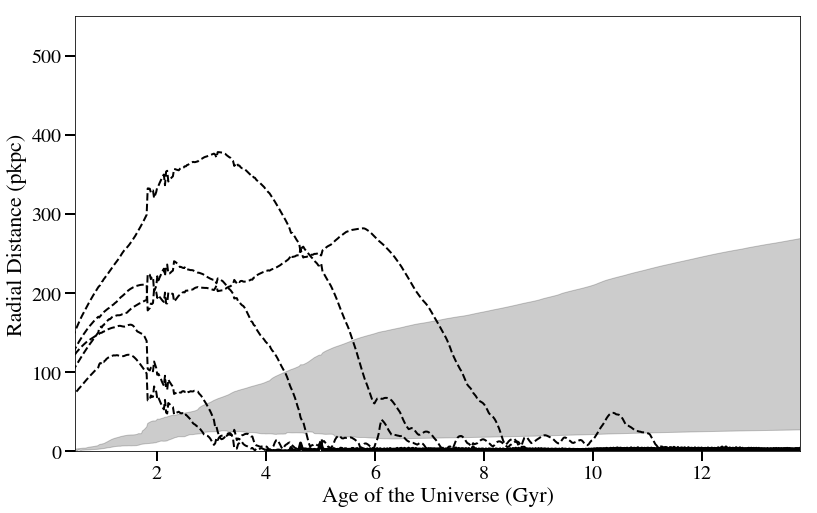

In [9]:
fig = plt.figure( figsize=(13,8), facecolor='w' )
ax = plt.gca()

w_plotter.plot_streamlines_vs_time(
    y_key = 'R',
    classification = 'is_in_main_gal', # Make sure we select particles in the main galaxy at z=0
    classification_ind = ind,
    start_ind = 0,
    end_ind = 600,
    sample_size = 5,
#     y_data_kwargs = { 'smooth_data' : True },
    ax = ax,
    x_range = [0.5, 13.8 ],
    y_range = [0., 550., ],
    horizontal_line_value = None,
    plot_CGM_region = True,
    return_y_max = True,
    vert_line_ind = None,
    line_features = gas_to_star_line_features,
)

fig

File saved at ./plots/r_vs_time_ind2.pdf


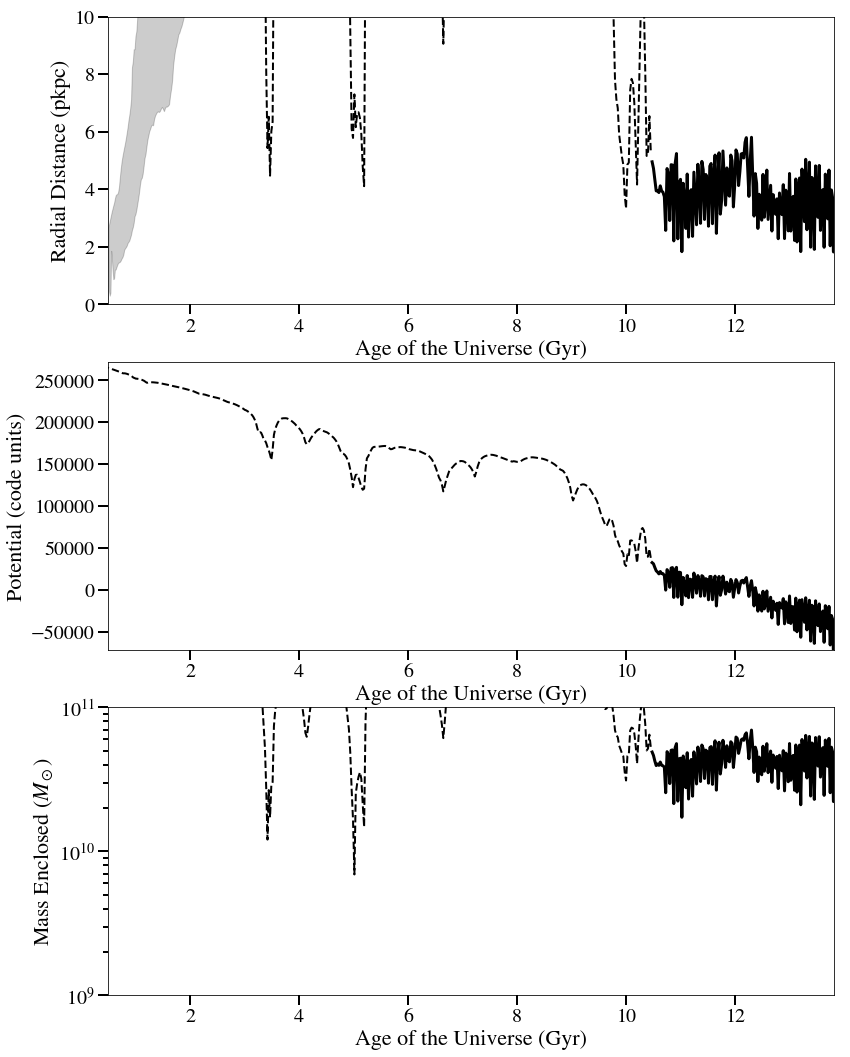

In [10]:
n_rows = 3

fig = plt.figure( figsize=(13,6*n_rows), facecolor='w' )
ax = plt.gca()

gs = matplotlib.gridspec.GridSpec(n_rows,1)

sample_ind = 2
sample_inds = [ sample_ind, ]

shared_args = {
    'classification_ind': ind,
    'start_ind': 1,
    'end_ind': 600,
    'sample_size': 1,
    'sample_inds': sample_inds,
    'horizontal_line_value': None,
    'vert_line_ind': None,
    'line_features': gas_to_star_line_features,
}

w_plotter.plot_streamlines_vs_time(
    y_key = 'R',
    ax = plt.subplot(gs[0,0]),
    x_range = [0.5, 13.8 ],
    y_range = [0., 10., ],
    plot_CGM_region = True,
    **shared_args
)

w_plotter.plot_streamlines_vs_time(
    y_key = 'Potential',
    ax = plt.subplot(gs[1,0]),
    x_range = [0.5, 13.8 ],
#     y_range = [0., 30., ],
    y_label = 'Potential (code units)',
    **shared_args
)

w_plotter.plot_streamlines_vs_time(
    y_key = 'M_enc',
    ax = plt.subplot(gs[2,0]),
    x_range = [0.5, 13.8 ],
    y_range = [1e9, 1e11, ],
    y_scale = 'log',
    y_label = r'Mass Enclosed ($M_\odot$)',
    **shared_args
)

save_file = 'r_vs_time_ind{}.pdf'.format( sample_ind )
plotting.save_fig(
    out_dir = './plots',
    save_file = save_file,
    fig = fig,
)

fig

# Examples

In [19]:
# xx component of the tidal tensor in ?? units
w.get_data( 'Txx' )

array([[ 1.68401038e+03,  1.37224009e+04,  1.43353557e+05, ...,
                    nan,             nan,             nan],
       [ 3.10993018e+04, -3.35112691e+04, -3.68489909e+04, ...,
                    nan,             nan,             nan],
       [-1.03283090e+04,  4.92700167e+03,  7.16424537e+03, ...,
                    nan,             nan,             nan],
       ...,
       [-2.05573413e+03,  3.69574079e+03,  4.93834064e+03, ...,
                    nan,             nan,             nan],
       [ 1.65441877e+04, -1.62521511e+04,  7.85060057e+03, ...,
                    nan,             nan,             nan],
       [-1.33318349e+03, -6.93641762e+01,  1.22211643e+03, ...,
                    nan,             nan,             nan]])

In [20]:
# x component of velocity in km/s
w.get_data( 'Vx' )

array([[ -77.87617 ,  -76.41616 ,  -59.94542 , ...,  -22.800724,
         -23.37643 ,  -27.598686],
       [ -61.790405, -141.14441 , -247.3695  , ...,  -21.359919,
         -22.077364,  -27.860495],
       [-245.80745 , -266.98462 , -276.73196 , ...,   22.1939  ,
          22.536568,   27.059608],
       ...,
       [-121.30452 , -135.81221 , -149.26129 , ...,   27.180893,
          28.72102 ,   43.9907  ],
       [ -91.20576 ,  -87.40076 ,  -83.589584, ...,   23.459576,
          24.807987,   37.950024],
       [ -13.551203,  -28.430765,  -43.88653 , ...,  -50.193096,
         -48.906704,  -40.536457]], dtype=float32)

In [21]:
# x component of position (relative to the galaxy center) in kpc
w.get_data( 'Rx' )

array([[-1.8195048e-01, -6.7609614e-03,  1.3622120e-01, ...,
        -1.6585701e+01, -1.6314644e+01, -1.2869000e+01],
       [-6.2726295e-01, -4.0910470e-01,  2.6846197e-02, ...,
        -1.7835457e+01, -1.7579292e+01, -1.4183209e+01],
       [-1.0335129e+00, -4.5207345e-01,  1.4793995e-01, ...,
         6.6291432e+00,  6.4072795e+00,  5.8099546e+00],
       ...,
       [-5.3928881e+00, -5.1005111e+00, -4.7934661e+00, ...,
         1.8594719e+01,  1.8312309e+01,  1.6804827e+01],
       [ 1.1422683e+00,  1.3408953e+00,  1.5190337e+00, ...,
         1.5458977e+01,  1.5218070e+01,  1.4102923e+01],
       [-3.2522631e+00, -3.2059798e+00, -3.1411226e+00, ...,
        -2.1983650e+01, -2.1434273e+01, -1.6962751e+01]], dtype=float32)

In [26]:
# Get the x component of position for cluster tracer i at snapshot snum
i = 3000
snum = 200
w.get_data( 'Rx' )[i,snum]

-17.287897

In [23]:
# Get the age of the universe, the redshift,
# and the snapshot number for each snapshot
w.get_data( 'time' ), w.get_data( 'redshift' ), w.get_data( 'snum' )

(array([13.804038  , 13.801819  , 13.799596  , 13.797379  , 13.795158  ,
        13.792942  , 13.790722  , 13.7885    , 13.786279  , 13.784057  ,
        13.7818365 , 13.759615  , 13.737378  , 13.7151165 , 13.692836  ,
        13.670529  , 13.648207  , 13.625861  , 13.6034975 , 13.58111   ,
        13.558699  , 13.536276  , 13.513823  , 13.491356  , 13.468863  ,
        13.446353  , 13.423817  , 13.401262  , 13.378688  , 13.356093  ,
        13.333476  , 13.310842  , 13.288181  , 13.265497  , 13.242799  ,
        13.220079  , 13.197336  , 13.174575  , 13.151789  , 13.12898   ,
        13.1061535 , 13.083312  , 13.060445  , 13.037555  , 13.0146475 ,
        12.991717  , 12.968768  , 12.945789  , 12.922799  , 12.899788  ,
        12.876753  , 12.8537    , 12.830622  , 12.807525  , 12.784408  ,
        12.761273  , 12.738112  , 12.714935  , 12.69173   , 12.668512  ,
        12.645271  , 12.62201   , 12.598725  , 12.575425  , 12.552103  ,
        12.528755  , 12.505394  , 12.482002  , 12.4